# scIB score plots
Compare scIB scores across integration methods and datasets.

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

from sklearn.preprocessing import minmax_scale

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [12]:
BIO=['graph_cLISI','NMI','ARI','ASW_cell_type']
BATCH=['PC_regression','ASW_batch','kBET','graph_connectivity','graph_iLISI']

#### Load data

In [28]:
# Mock data
#data=pd.DataFrame(np.random.randint(0,10,(4,len(BIO)+len(BATCH))),columns=BIO+BATCH)
#data['dataset']=['d1','d1','d2','d2']
#data['method']=['m1','m2','m1','m2']

In [8]:
data=[]
for method in ['seurat','symphony','scvi','qtr']:
    res=pkl.load(open('/storage/groups/ml01/workspace/karin.hrovatin/data/pancreas/scRNA/qtr/integrated/gsCellType_query/model/adata_norm_integrated_RefQueryTraining_scIB_metrics_IE_X_'+\
                  method+'_B_study_sample_CT_cell_type.pkl',
                  'rb'))
    res['method']=method
    res['dataset']='pancreas'
    data.append(res)
data=pd.DataFrame(data)

In [10]:
display(data)

,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,graph_cLISI,NMI,ARI,ASW_cell_type,method,dataset
0,0.621512,0.783044,0.100516,0.711807,0.144000,0.998079,0.770819,0.187902,0.589852,seurat,pancreas
1,0.606405,0.793846,0.000507,0.912247,0.140173,0.999395,0.801206,0.882060,0.595645,symphony,pancreas
2,0.678289,0.835677,0.000003,0.882001,0.125252,0.999182,0.788940,0.696874,0.535466,scvi,pancreas
3,0.479759,0.812468,0.000806,0.672501,0.081353,0.999090,0.792842,0.780330,0.536552,qtr,pancreas


In [14]:
# Min-Max normalise scores within dataset
data_norm_group=data.copy()
for metric in BIO+BATCH:
    for dataset in data.dataset.unique():
        rows=data_norm_group.index[data_norm_group.dataset==dataset]
        data_norm_group.loc[rows,metric]=minmax_scale(data.loc[rows,metric].values.reshape(-1,1))

#### All scores
Plots of scores min-max normalised within datasets.

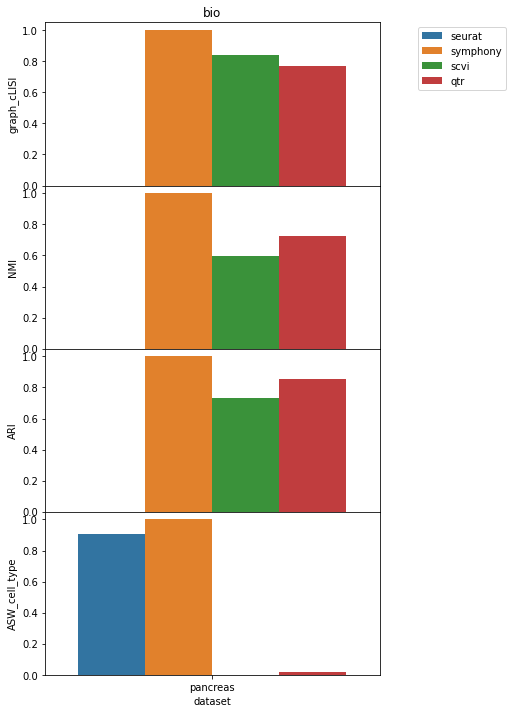

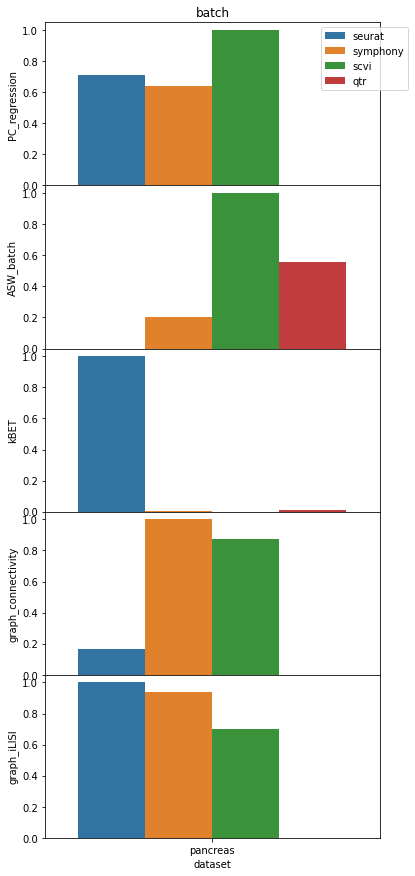

In [15]:
# Score values across datasets and methods
for name,metrics in {'bio':BIO,'batch':BATCH}.items():
    ncol=1
    nrow=len(metrics)
    fig,ax=plt.subplots(nrow,ncol,figsize=(6*ncol,3*nrow),sharex=True)
    for idx,metric in enumerate(metrics):
        sb.barplot(x='dataset',y=metric,hue='method',data=data_norm_group,ax=ax[idx])
        if idx!=0:
            ax[idx].legend_.remove()
        else:
             ax[idx].legend(bbox_to_anchor=(1.1, 1))
    ax[0].set_title(name)
    plt.subplots_adjust(wspace=0, hspace=0)

#### Summarised scores
Prepare summary scores.
Scores are min-max normalised within each dataset. Mean is computed for bio and batch scores and the overall scores is a weighetd average of bio and batch score.

In [16]:
# Compute summary metrics
data_norm_group['bio']=data_norm_group[BIO].mean(axis=1)
data_norm_group['batch']=data_norm_group[BATCH].mean(axis=1)
data_norm_group['overall']=data_norm_group['bio']*0.6+data_norm_group['batch']*0.4

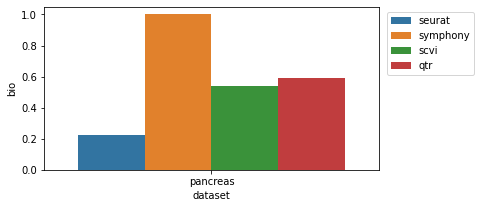

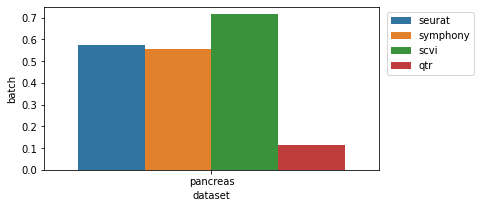

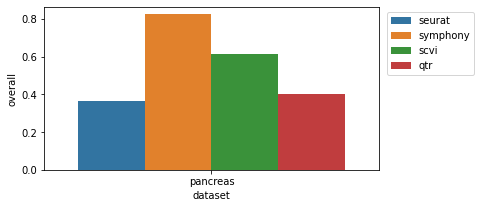

In [17]:
for summary in ['bio','batch','overall']:
    fig,ax=plt.subplots(figsize=(6,3))
    sb.barplot(x='dataset',y=summary,hue='method',data=data_norm_group,ax=ax)
    ax.legend(bbox_to_anchor=(1.3, 1))